# Comparison between RS and CZT

In this example, we will analyze how CZT algorithm produces better results than in RS when the region of interest in the focus of a lens.

## X Scheme

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X


In [2]:
focal = 25*mm
diameter = 4*mm

# Initial parameters
x0 = np.linspace(-diameter/2 - 50*um, diameter/2 + 50*um, 4096)
wavelength = 0.6238*um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter/2)

u1 = t0 * u0


**RS**

CPU times: user 248 ms, sys: 3.67 ms, total: 251 ms
Wall time: 277 ms


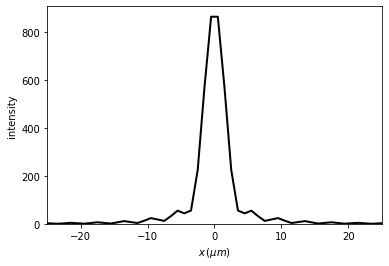

In [3]:
%%time
u2_rs = u1.RS(z=focal, verbose=False)
u2_rs.draw()
plt.xlim(-25, 25)

**CZT**

CPU times: user 59.5 ms, sys: 0 ns, total: 59.5 ms
Wall time: 71.4 ms


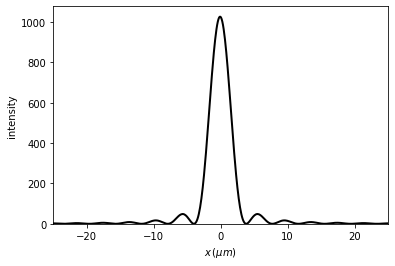

In [4]:
%%time
xout=np.linspace(-25,25,512)
u2_czt = u1.CZT(z=focal, xout=xout)
u2_czt.draw()


## XZ scheme

In [5]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [6]:
focal = 15*mm
diameter = 4*mm

x0 = np.linspace(-diameter/2, diameter/2, 1024)
wavelength = 0.6238*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter/2, focal=focal)

u1 = u0 * t0


**RS**

CPU times: user 805 ms, sys: 305 ms, total: 1.11 s
Wall time: 2.44 s


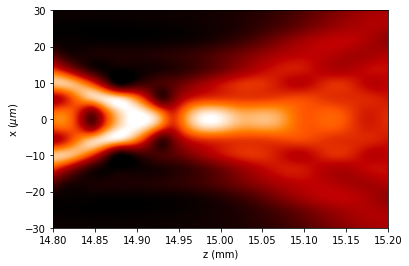

In [7]:
%%time
z0 = np.linspace(14.8*mm, 15.2*mm, 512)
u2_rs = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2_rs.incident_field(u1)
u2_rs.RS(num_processors=4);
u2_rs.draw(logarithm=1e-1, z_scale='mm')
plt.ylim(-30,30)


**CZT**

CPU times: user 2.43 s, sys: 7.56 ms, total: 2.44 s
Wall time: 3.9 s


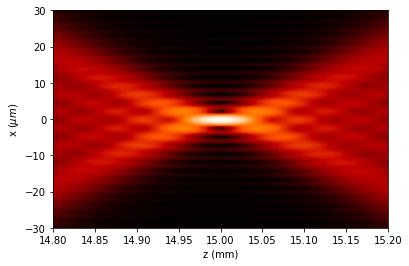

In [8]:
%%time
xout=np.linspace(-30,30,256)
u2_czt = u1.CZT(z=z0, xout=xout)
u2_czt.draw(logarithm=1e-1, z_scale='mm')


### XY scheme

In [9]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [10]:
diameter = 2*mm
focal = 25*mm

x0 = np.linspace(-diameter/2, diameter/2, 1024)
y0 = np.linspace(-diameter/2, diameter/2, 1024)
wavelength = 0.6238*um

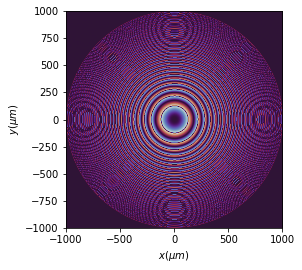

In [11]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0*um, 0*um),
        radius=(diameter/2, diameter/2),
        focal=(focal, focal))

t0.draw('phase')

u1 = u0 * t0


**RS**

CPU times: user 3.84 s, sys: 346 ms, total: 4.19 s
Wall time: 4.03 s


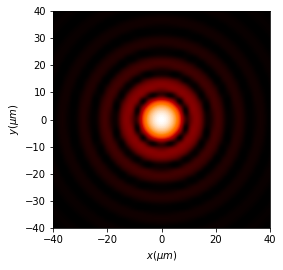

In [12]:
%%time
u2_rs = u1.RS(z=focal)

u2_rs.cut_resample(x_limits=(-40, 40),
                   y_limits=(-40, 40),
                   num_points=(128, 128),
                   new_field=False,
                   interp_kind=(3, 1))

u2_rs.draw(logarithm=1e-2)


**CZT**

CPU times: user 774 ms, sys: 185 ms, total: 959 ms
Wall time: 709 ms


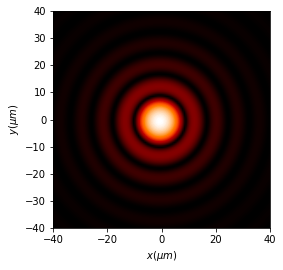

In [13]:
%%time
xout=np.linspace(-40,40,128)
yout=np.linspace(-40,40,128)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout)

u2_czt.draw(logarithm=1e-2)


## Vector scheme

In [14]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY


In [15]:
diameter = 2*mm
x0 = np.linspace(-diameter/2, diameter/2, 512)
y0 = np.linspace(-diameter/2, diameter/2, 512)
wavelength = 0.6238*um


In [16]:
focal = 25*mm
limit = 80*um


In [17]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0*um, 0*um),
        radius=(diameter/2, diameter/2),
        focal=(focal, focal))

u1 = u0 * t0


In [18]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u1, v=[(1 - 1j)/2, (1 + 1j)/2])


**RS**

CPU times: user 2.61 s, sys: 388 ms, total: 3 s
Wall time: 2.37 s


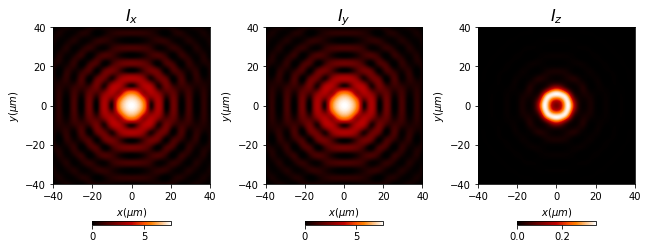

In [19]:
%%time
EM1_rs = EM0.VRS(z=focal)
EM1_rs.cut_resample(x_limits=(-limit/2, limit/2),
                          y_limits=(-limit/2, limit/2),
                          num_points=(128, 128),
                          new_field=False,
                          interp_kind=(3, 1))

EM1_rs.draw('intensities', logarithm=1e-1)

**CZT**

CPU times: user 1.55 s, sys: 372 ms, total: 1.92 s
Wall time: 1.39 s


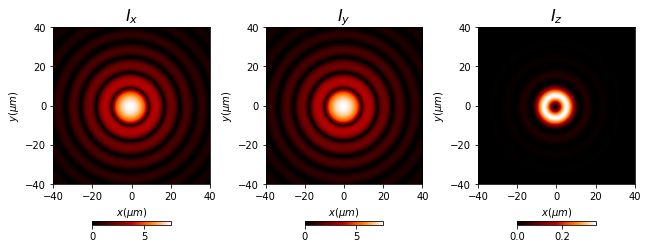

In [20]:
%%time
xout = np.linspace(-limit/2, limit/2, 128)
yout = np.linspace(-limit/2, limit/2, 128)
EM1_czt = EM0.CZT(z=focal, xout=xout, yout=yout)
EM1_czt.draw('intensities', logarithm=1e-1)